# Web-scraping geophysical data using Pandas

### By Mark Naylor, School of GeoSciences, University of Edinburgh
### https://blogs.ed.ac.uk/mnaylor/2018/10/06/web-scraping-in-python/

---

# Introduction

Web-scraping is the action of getting data from online sources, without first having to download that data to a file or copying it into an excel spreadsheet.

This quick start guide shows some examples of how to scrape data from the web.

- I have not tried to beautify the plots
- Whether these tricks work depends upon how the website was constructed, so they wont always work...!
- But when they do it can be really helpful and save you lot's of time!

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [8, 8]

---

## 1. Southern California Earthquake catalogue [from space delimited data]

Look one of the catalogues on this ftp site: http://service.scedc.caltech.edu/ftp/catalogs/SCEC_DC/


### Load a single year from the catalogue
Select the url of one of the catalogues, enter it in the code below and run it:

In [ ]:
url = "http://service.scedc.caltech.edu/ftp/catalogs/SCEC_DC/1932.catalog"
df = pd.read_csv(url , delim_whitespace=True, skiprows=9)

df.plot(kind="scatter", x="LAT", y="LON")

print(df.head())
print(df.shape)

### Iterate over all the years and create a unified catalogue

It would be a pain if we had to load each catalogue manually and append them together. So, let's iterate over them using Python instead!

- You can append Pandas DataFrames together using the `df1.append(df2)`. This appends `df1` and `df2` together - both need to be DataFrame objects. See the example below.

- In the `print` call below I have included the argument `end='\r'` which means the print statement will overwrite as each year is processed. (Only works in Python 3)

In [47]:
df_full = pd.DataFrame()

for i in range(1932,2019):
    url = "http://service.scedc.caltech.edu/ftp/catalogs/SCEC_DC/"+str(i)+".catalog"
    print("Processing year:"+str(i), end='\r')
    df_tmp = pd.read_csv(url , delim_whitespace=True, skiprows=9)
    df_full = df_full.append(df_tmp)

We can find how many events there are in the catalogue using the `shape` attribute: 

In [48]:
df_full.shape

(712633, 13)

And the head of the dataframe is:

In [49]:
df_full.head()

#YYY/MM/DD  HH:mm:SS.ss  ET GT   MAG  M     LAT      LON  DEPTH  Q  \
0  1932/01/01  23:52:07.87  eq  l  0.00  n  34.130 -117.993    6.0  D   
1  1932/01/02  16:42:43.68  eq  l  2.73  l  33.903 -117.645    6.0  C   
2  1932/01/03  17:58:10.01  eq  l  3.00  h  32.000 -116.000    6.0  D   
3  1932/01/04  21:30:00.96  eq  l  2.00  h  33.771 -117.494    6.0  C   
4  1932/01/05  02:37:27.96  eq  l  1.50  h  33.559 -118.442    6.0  C   

        EVID   NPH  NGRM  
0  3358386.0   7.0   0.0  
1  3358387.0  12.0   0.0  
2  3358388.0   7.0   0.0  
3  3358396.0  11.0   0.0  
4  3358398.0   8.0   0.0

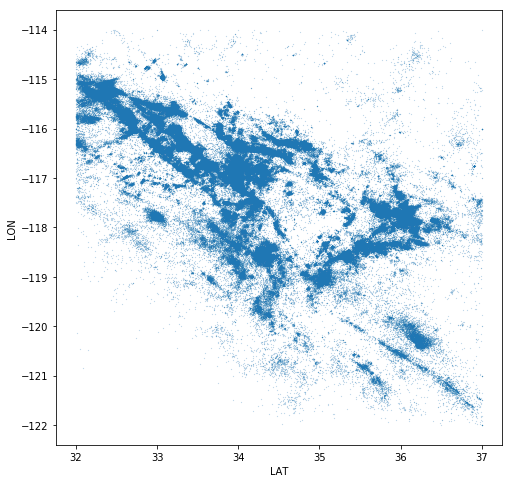

In [55]:
df_full.plot(kind="scatter", x="LAT", y="LON", s=0.01)

---

## 2. NOAA: Significant volvanic eruptions [tab delimited data from web]

There us a tab delimited download off here:
https://www.ngdc.noaa.gov/nndc/servlet/ShowDatasets?dataset=102557&search_look=50&display_look=50

In [10]:
url="https://www.ngdc.noaa.gov/nndc/struts/results?type_0=Exact&query_0=$HAZ_EVENT_ID&t=102557&s=50&d=54&dfn=volerup.txt"
df = pd.read_csv(url,sep="\t")
df.head()

Year  Month  Day  TSU   EQ             Name            Location  \
0 -4360    NaN  NaN  NaN  NaN  Macauley Island         Kermadec Is   
1 -4350    NaN  NaN  NaN  NaN            Kikai           Ryukyu Is   
2 -4050    NaN  NaN  NaN  NaN           Masaya           Nicaragua   
3 -4000    NaN  NaN  NaN  NaN             Pago  New Britain-SW Pac   
4 -3580    NaN  NaN  NaN  NaN             Taal   Luzon-Philippines   

            Country  Latitude  Longitude                 ...                  \
0       New Zealand   -30.200   -178.470                 ...                   
1             Japan    30.780    130.280                 ...                   
2         Nicaragua    11.984    -86.161                 ...                   
3  Papua New Guinea    -5.580    150.520                 ...                   
4       Philippines    14.002    120.993                 ...                   

   TOTAL_DEATHS TOTAL_DEATHS_DESCRIPTION TOTAL_MISSING  \
0           NaN                      NaN           NaN   
1           NaN                      3.0           NaN   
2           NaN                      NaN           NaN   
3           NaN                      1.0           NaN   
4           NaN                      NaN           NaN   

  TOTAL_MISSING_DESCRIPTION  TOTAL_INJURIES TOTAL_INJURIES_DESCRIPTION  \
0                       NaN             NaN                        NaN   
1                       NaN             NaN                        NaN   
2                       NaN             NaN                        NaN   
3                       NaN             NaN                        NaN   
4                       NaN             NaN                        NaN   

   TOTAL_DAMAGE_MILLIONS_DOLLARS  TOTAL_DAMAGE_DESCRIPTION  \
0                            NaN                       NaN   
1                            NaN                       3.0   
2                            NaN                       NaN   
3                            NaN                       1.0   
4                            NaN                       NaN   

   TOTAL_HOUSES_DESTROYED  TOTAL_HOUSES_DESTROYED_DESCRIPTION  
0                     NaN                                 NaN  
1                     NaN                                 3.0  
2                     NaN                                 NaN  
3                     NaN                                 NaN  
4                     NaN                                 NaN  

[5 rows x 36 columns]

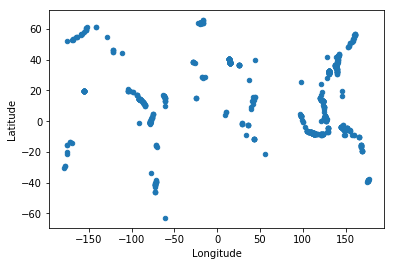

In [11]:
df.plot(kind="scatter", y="Latitude", x="Longitude")

---
## 3. Human-Induced earthquakes database [Excel form web]

There is an excel download linked off here:
https://inducedearthquakes.org

In [84]:
xl = pd.read_excel("http://inducedearthquakes.org/wp-content/uploads/2018/08/The_Human_Induced_Earthquake_Database.xlsx")
xl.head()

Country Earthquake cause (main class)  \
0   Algeria                           CCS   
1       USA                           CCS   
2  Botswana        Coal Bed Methane (CBM)   
3        UK                  Construction   
4    Taiwan                  Construction   

            Earthquake cause (subclass)  \
0                         CO2 injection   
1                         CO2 injection   
2                Coal Bed Methane (CBM)   
3  Coastal engineering (geoengineering)   
4                          Construction   

                            Project name  Latitude (approximate)  \
0                               In Salah               29.088942   
1  Decatur, Illinois, demonstration site               39.876933   
2           Selemo and Lesedi pilot pods              -22.586373   
3                             Folkestone               51.104297   
4                             Taipei 101               25.033985   

  Longitude (approximate) Project start date Project end date  \
0                 2.21383               2004              NaN   
1                -88.8934    2011 (November)  2014 (November)   
2                 25.8459               2014              NaN   
3                 1.27138               1806              NaN   
4                 121.564                NaN              NaN   

  Seismicity or monitoring start date Seismicity or monitoring end date  \
0                       2009 (August)                       2011 (June)   
1                         2013 (July)                   2014 (December)   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 NaN                               NaN   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

  Maximum injection/extraction rate (max unless stated) Rate units  \
0                                                 43       mcf/day   
1                                               11.6          kg/s   
2                                                NaN           NaN   
3                                                NaN           NaN   
4                                                NaN           NaN   

   Total volume or mass of material injected/extracted Volume or mass units  \
0                 3850000 (as of 2013), 3500000 (m3)                 tonnes   
1                               1000000, 910000 (m3)                 tonnes   
2                                                NaN                    NaN   
3                                         2800000000                     kg   
4                                     258138 (proxy)                    NaN   

  Maximum injection pressure (MPa) Change in reservoir pressure (MPa)  \
0                               16                      12 (modelled)   
1                              NaN                                NaN   
2                              NaN                                NaN   
3                              NaN                                NaN   
4                              NaN                                NaN   

   Stress change (MPa) Bottom hole temperature (°C)  \
0                  NaN                          NaN   
1                  NaN                          NaN   
2                  NaN                          NaN   
3           0.001-0.03                          NaN   
4                 0.47                          NaN   

                                               Notes  \
0  Injection into gas field but no apparent conne...   
1   Volume assuming liquid CO2 density of 1100 kg/m3   
2  Albano et al. (2017) provide strong evidence f...

This dataframe still needs some cleaning (e.g. the Longitute column is not numeric) but let's do a simple frequency plot to show that it is starting to be in a useful format.

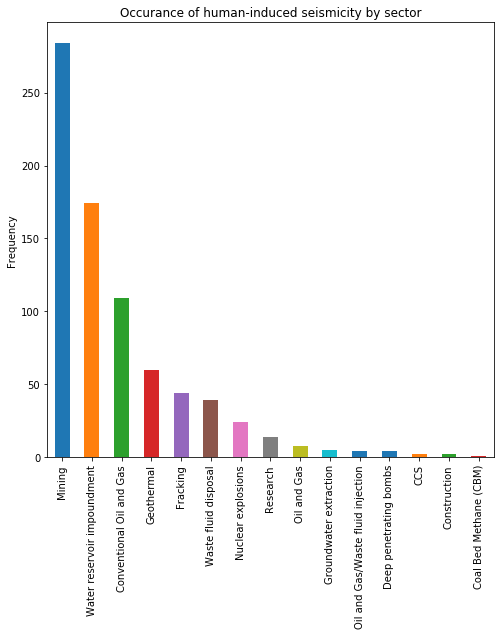

In [42]:
xl['Earthquake cause (main class)'].value_counts().plot(kind='bar')
plt.ylabel("Frequency")
plt.title("Occurance of human-induced seismicity by sector")
plt.savefig("inducedSeismicitySummary.png")

---

## 4. Our world in natural catastrophies [from html table on web]

Have a look at this page and the underlying datasets linked from here: https://ourworldindata.org/natural-catastrophes. We can see a range of graphs presenting information about natural catastropies.

There is a link to a page containing two html tables of data at https://ourworldindata.org/ofdacred-international-disaster-data.

- We can extract these two tables using `pd.read_html()`

In [9]:
dfs = pd.read_html("https://ourworldindata.org/ofdacred-international-disaster-data")

This has created a list of DataFrames, one for each table.

- Let's extract the first table and have a look at it

In [10]:
df1 = dfs[0]
df1.index=df1['Yearly average global annual deaths from natural disasters, by decade']
df1 = df1.drop('Yearly average global annual deaths from natural disasters, by decade', 1)
df1

Drought  Earthquake  \
Yearly average global annual deaths from natura...                        
1900s                                                130000       17302   
1910s                                                  8500        6280   
1920s                                                472400       54935   
1930s                                                     0       23770   
1940s                                                345000       16187   
1950s                                                     0        2093   
1960s                                                150865        5236   
1970s                                                 11908       44022   
1980s                                                 55727        6015   
1990s                                                   311       10359   
2000s                                                   115       45364   
2010s                                                  3339       43302   

                                                    Extreme temperature  \
Yearly average global annual deaths from natura...                        
1900s                                                                 0   
1910s                                                                 0   
1920s                                                                 0   
1930s                                                               169   
1940s                                                                 0   
1950s                                                               150   
1960s                                                               113   
1970s                                                               155   
1980s                                                               534   
1990s                                                               932   
2000s                                                              9106   
2010s                                                             11644   

                                                     Flood  Impact  Landslide  \
Yearly average global annual deaths from natura...                              
1900s                                                   63       0          5   
1910s                                                10138       0          0   
1920s                                                  428       0         43   
1930s                                               436147       0        103   
1940s                                                10103       0       1753   
1950s                                               205830       0        215   
1960s                                                 3239       0        504   
1970s                                                 5078       0        738   
1980s                                                 5155       0        623   
1990s                                                 9549       0        833   
2000s                                                 5401       0        772   
2010s                                                 5811       0       1069   

                                                    Mass movement (dry)  \
Yearly average global annual deaths from natura...                        
1900s                                                                13   
1910s                                                                12   
1920s                                                                 0   
1930s                                                                 4   
1940s                                                                 0   
1950s                                                                 0   
1960s                                                               218   
1970s                                                                 7   
1980s                                                            

We can start to analyse the data with a line plot

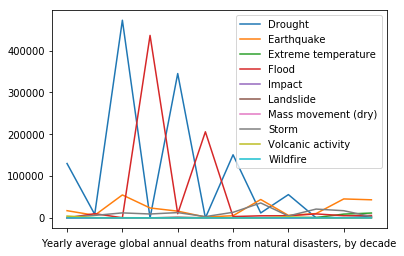

In [11]:
## For a line plot
df1.plot(kind="line")
plt.ylabel("Number of deaths per decade")

But a stacked area plot will be better so that we can resolve each component more clearly

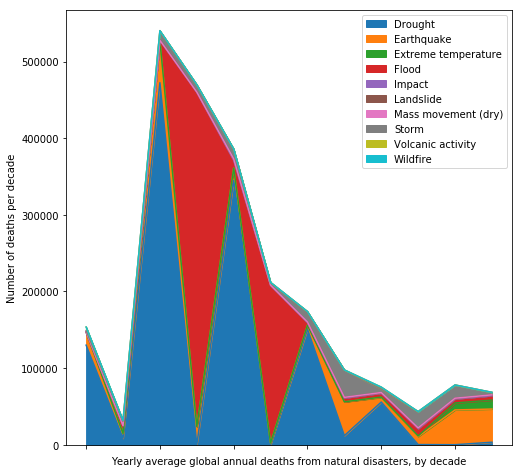

In [41]:
## For stacked area plot
df1.plot(kind="area")
plt.ylabel("Number of deaths per decade")
plt.savefig("deathsPerDecadeByHazard.png")

This still needs tidying up in terms of the axis labels - but it is getting there.

---

## 5. Specific heats and molar heat capacities for various substances at 20 C [html table]

As a final example, lets extract a table from page about heat capacities.

http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/sphtt.html#c1

In [65]:
dfs = pd.read_html("http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/sphtt.html#c1")

In [68]:
dfs[1]

0            1                         2               3
0        Substance  c in J/gm K  c in cal/gm K orBtu/lb F  Molar CJ/mol K
1         Aluminum        0.900                     0.215            24.3
2          Bismuth        0.123                    0.0294            25.7
3           Copper        0.386                    0.0923            24.5
4            Brass        0.380                     0.092             ...
5             Gold        0.126                    0.0301            25.6
6             Lead        0.128                    0.0305            26.4
7           Silver        0.233                    0.0558            24.9
8         Tungsten        0.134                    0.0321            24.8
9             Zinc        0.387                    0.0925            25.2
10         Mercury        0.140                     0.033            28.3
11  Alcohol(ethyl)          2.4                      0.58             111
12           Water        4.186                      1.00            75.2
13     Ice (-10 C)         2.05                      0.49            36.9
14         Granite         .790                      0.19             ...
15           Glass          .84                      0.20             ...

---

## 6. Harvesting data from the Edinburgh GeoSciences Met Station

The code below harvests a years worth of data from the repository for the GeoSciences Met Station: 
https://www.ed.ac.uk/geosciences/weather-station

In [44]:
months = ['Jan','Feb','Mar','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
months = ['Jan']
year = 2016

df_full = pd.DataFrame()

for month in months:
    url = "https://www.geos.ed.ac.uk/~weather/jcmb_ws/JCMB_"+str(year)+"_"+month+".csv"
    df_tmp = pd.read_csv(url, skiprows=[0,2,3], parse_dates=['TIMESTAMP'], index_col=0)
    df_full = df_full.append(df_tmp)

In [45]:
df_tmp.shape

(44639, 17)